In [2]:
import numpy as np
from PIL import Image
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
import math


In [3]:
# Consts
poster_ratio = 18 / 24

In [34]:
# Loading IMG
source_img = '../assets/samples/ny.png'
full_res_img = np.array(Image.open(source_img))[:,:,:3]  / 255

working_width = 1000
working_img = cv2.resize(full_res_img, dsize=(working_width, working_width), interpolation=cv2.INTER_CUBIC)

## Utilities

In [15]:
def show(img):
    plt.figure(figsize = (10,10))
    plt.imshow(img)

In [41]:
def smoother (n,a):
    return (1/(1+((1/n) - 1)**((a/n)+1)))

In [17]:
def fade_line (fade_time, distance):
    return np.tile(np.arange(fade_time), (distance,1)) / (fade_time-1)

In [18]:
def fade_box (w,h,t):
    lw = fade_line(t,w)
    lh = fade_line(t,h)
    out = np.zeros((w,h))
    out[:,:t] = np.maximum(1-lw, out[:,:t])
    out[:,h-t:] = np.maximum(lw, out[:,h-t:])
    out[:t,:] = np.maximum(1-lh.T, out[:t,:])
    out[w-t:,:] = np.maximum(lh.T, out[w-t:,:])
    return out

In [19]:
def add_text ( a, font="", text="", x=0, y=0, size=50, color=(255,255,255)):
    
    # Create layer
    image = Image.new('RGB', (a.shape[1], a.shape[0]), (0,0,0))
    draw = ImageDraw.Draw(image)
    
    # load font
    font = ImageFont.truetype(font, size)  

    # positioning
    w, h = draw.textsize(text, font=font)
    draw.text((x-w//2,y-h//2,0),text,color,font=font)
    
    return 1-(1-a + np.array(image)/255)

In [20]:
def save (a, i):
    _ = np.uint8(a*255)
    img = Image.fromarray(_, 'RGB')
    img.save(f"{i}.png")

In [21]:
def add_border (a, inset, width, color):
    
    a[inset:-inset,inset:inset+width] = color
    a[inset:inset+width,inset:-inset] = color
    
    a[inset:-inset,-inset-width:-inset] = color
    a[-inset-width:-inset,inset:-inset] = color
    
    return a

## Faded Chin Poster

In [51]:
def style_faded_chin_border(use_image, use_width):
    
    # How much of the canvas does our image take up?
    image_ratio = 20 / 24

    # Create canvas
    width = int(use_width * image_ratio)
    height = int(width * poster_ratio ** -1)
    
    _canvas = np.zeros((height, width, 3))

    # Place Image
    _cut = int((use_width - width)/2)
    _cut2 = math.ceil((use_width - width)/2)
    _canvas[:use_width,:] = use_image[:,_cut:-_cut2]
    
    # Add Border
    border_percent = 0.3
    border_size = int(width * border_percent)

    _border = fade_box(width, use_width, border_size)
    _border = smoother(_border, 0.2)
    
    _canvas = 1 - _canvas
    _canvas[:use_width, :width,0] = np.maximum(_canvas[:use_width, :width,0], _border.T)
    _canvas[:use_width, :width,1] = np.maximum(_canvas[:use_width, :width,1], _border.T)
    _canvas[:use_width, :width,2] = np.maximum(_canvas[:use_width, :width,2], _border.T)

    # Add Font
    _with_font = add_text(_canvas, font="Jura-Medium.ttf", text="New York", x=width//2, y=height-650,size=250,color=(255,255,255))
    _canvas = add_text(_with_font, font="Jura-Light.ttf", text="New York", x=width//2, y=height-300, size=125)

    # Border
    add_border(_canvas, 50, 12, 0)
    add_border(_canvas, 0, 20, 0.5)
    
    # Fix me being dumb?
    _canvas[_canvas > 1] = 1
    _canvas[_canvas < 0] = 0
    
    return _canvas

/home/eric/anaconda3/envs/828/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/eric/anaconda3/envs/828/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


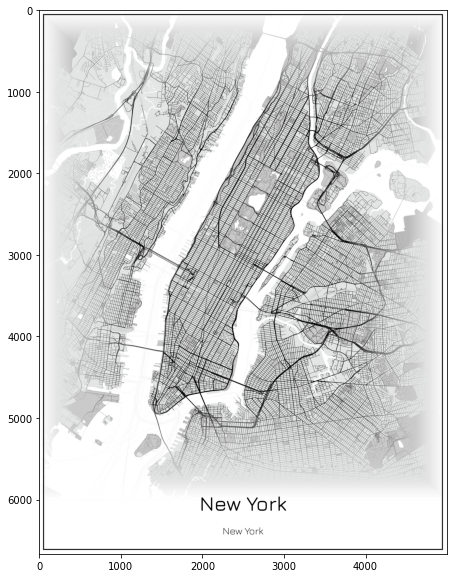

In [52]:
_ = style_faded_chin_border( full_res_img, full_res_img.shape[0] )
save( _, 0)
show( _ )